In [1]:
from util._io import read_config
from collections import namedtuple
from pathlib import Path
import pandas as pd
import numpy as np
import fastsca
import logging
import _rpstruct as rp
import importlib
importlib.reload(rp)
from sklearn.metrics.cluster import contingency_matrix,adjusted_rand_score
import matplotlib.pylab as plt
import seaborn as sns
import _scanpy as s
np.random.seed(42)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
experiment = '/projects/experiments/asapp/'
server = Path.home().as_posix()
experiment_home = server+experiment
experiment_config = read_config(experiment_home+'config.yaml')
args = namedtuple('Struct',experiment_config.keys())(*experiment_config.values())

sca = fastsca.FASTSCA()
sca.config = args
sca.initdata()
fn = sca.config.home + sca.config.experiment +sca.config.output + sca.config.sample_id+'/'+sca.config.sample_id

                           cell  label_x      label_y
0      CID3586_AAGACCTCAGCATGAG        7  Endothelial
1      CID3586_AAGGTTCGTAGTACCT        7  Endothelial
2      CID3586_ACCAGTAGTTGTGGCC        7  Endothelial
3      CID3586_ACCCACTAGATGTCGG        7  Endothelial
4      CID3586_ACTGATGGTCAACTGT        7  Endothelial
...                         ...      ...          ...
78093  CID4398_TCAGGTAGTACTCAAC        5      Myeloid
78094  CID4398_TCTATTGTCGCCATAA        5      Myeloid
78095  CID4398_TCTTTCCCAGTAAGCG        5      Myeloid
78096  CID4398_TGCCCATGTTACGGAG        5      Myeloid
78097  CID4398_TTGAACGTCCTATTCA        5      Myeloid

[78098 rows x 3 columns]
0.22673231802508337


Text(10.049999999999997, 0.5, 'Leiden group count')

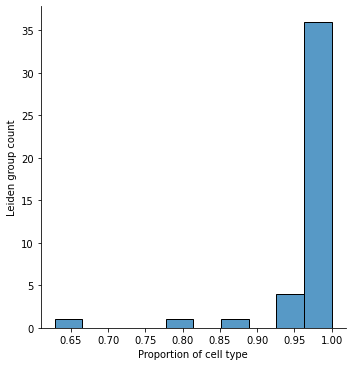

In [4]:


df_gt = pd.read_csv(fn+'_metadata.csv.gz')
df_tl = pd.read_csv(fn+'_scanpy_label.csv.gz')
df_join = pd.merge(df_tl,df_gt,on='cell',how='left')
print(df_join)
from sklearn.metrics.cluster import contingency_matrix,adjusted_rand_score
print(adjusted_rand_score(df_join.label_y,df_join.label_x))
df_scmatch = pd.DataFrame(contingency_matrix(df_join.label_x,df_join.label_y))
df_scmatch = df_scmatch.div(df_scmatch.sum(axis=1), axis=0)
sns.displot(df_scmatch.max(1).values,bins=10)
plt.xlabel('Proportion of cell type')
plt.ylabel('Leiden group count')

In [5]:
df_join

,cell,label_x,label_y
0,CID3586_AAGACCTCAGCATGAG,7,Endothelial
1,CID3586_AAGGTTCGTAGTACCT,7,Endothelial
2,CID3586_ACCAGTAGTTGTGGCC,7,Endothelial
3,CID3586_ACCCACTAGATGTCGG,7,Endothelial
4,CID3586_ACTGATGGTCAACTGT,7,Endothelial
...,...,...,...
78093,CID4398_TCAGGTAGTACTCAAC,5,Myeloid
78094,CID4398_TCTATTGTCGCCATAA,5,Myeloid
78095,CID4398_TCTTTCCCAGTAAGCG,5,Myeloid
78096,CID4398_TGCCCATGTTACGGAG,5,Myeloid


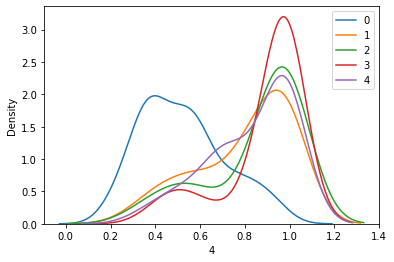

In [6]:
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv(fn+'_cluster_trace.csv.gz')

for i in range(5):
    sns.distplot(df.iloc[i,:],label=i,hist=False)
plt.legend()


In [7]:
dfv = pd.read_csv(fn+'_cluster_val_trace.csv.gz')
dfv

,0
0,0.521764
1,0.799055
2,0.847397
3,0.887165
4,0.827081


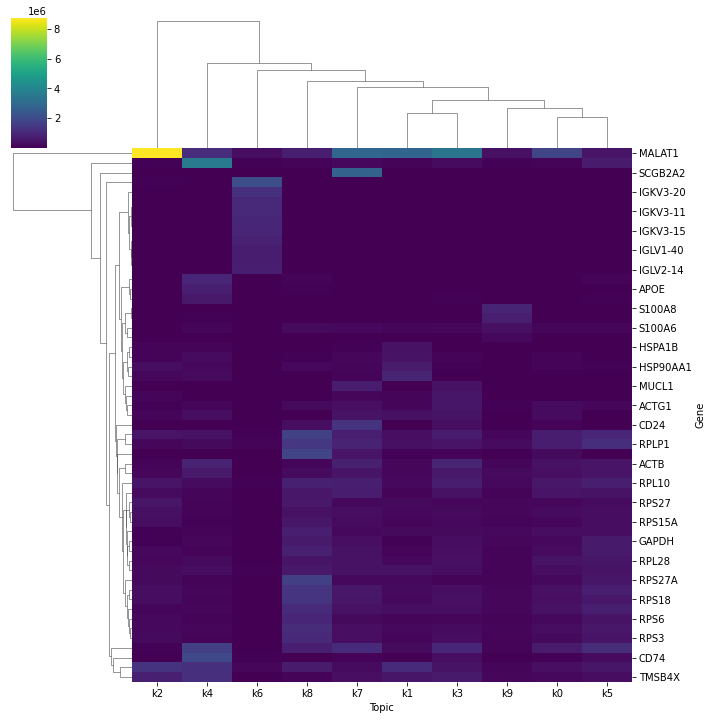

In [9]:
import _topics_util as tpu 
import matplotlib.pylab as plt
import seaborn as sns

dfh = pd.read_csv(fn+'_5_beta.csv.gz')

dfh.columns = sca.data.cols
df_top = tpu.get_topic_top_genes(dfh,10)

df_top = df_top.pivot(index='Topic',columns='Gene',values='Proportion')
sns.clustermap(df_top.T,cmap='viridis')